In [1]:
import warnings
warnings.filterwarnings("ignore")

import nelpy as nel
import pandas as pd
import scipy.ndimage.filters
import os
import sys
import warnings
import numpy as np
import pickle
import random

import copy
import matplotlib.pyplot as plt

In [2]:
jar = nel.load_pkl('gor01vvp01pin01_processed_speed.nel')

In [3]:
s = '16-40-19'
exp_data = jar.exp_data[s]

In [19]:
exp_data['spikes'].n_events

array([ 27573,    436,  81909,    563,    419,   3139,    269,   7998,
          603,   5341,   3922,  36055,   2118,   2209,   1667,    219,
        38562,    180,    169,    564,  64219,   3064,   1361,   4210,
          276,   1286,     84,   5962,    240,   1883,     39,    693,
            3,   2617,    765,  20330,   2244,    148,    397,    202,
          932,   6953,   2295,   1302,    139,   5086,    357,    184,
         1048,   2068,     34,  16017,   3209,  86111,   1017,   2862,
         4455,  26662,   7415,  18153,   1020,  19094,  27126,   5018,
         5207,    132,   2296, 100995,    726,   2143,   1345,   3975,
           86,   2998,  70501,    409,   1280,    353,    583,     89,
          336,   1320,   4224,    374,     15,   3060,    141,    483,
          364,   3229,    518,     67,   1231,   1730,   5434,      6,
          947,    258,  60302,  17321,    725,    136,   9796,   1030,
         5032,   1791,  89524,    227,  11488,   2310,   2526,    606,
      

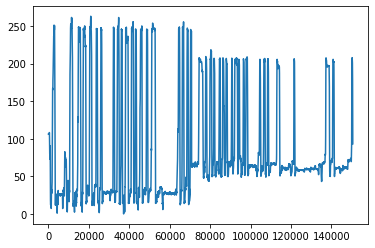

In [5]:
plt.plot(exp_data['pos1d'].data.squeeze())

## PBEs
### track1

In [4]:
aux_data = jar.aux_data[s]

In [5]:
del jar

In [8]:
exp_data.keys()

dict_keys(['spikes', 'eeg', 'pos', 'unit_map', 'pos2d', 'mua', 'pos1d', 'speed', 'run_epochs', 'rest_epochs', 'mua_epochs'])

In [10]:
aux_data['long'].keys(), aux_data['short'].keys()

(dict_keys(['PBEs', 'st_run', 'tc', 'tc_placecells', 'st_placecells', 'pos2d']),
 dict_keys(['PBEs', 'st_run', 'tc', 'tc_placecells', 'st_placecells', 'pos2d']))

In [11]:
aux_data['long']['PBEs']

<BinnedSpikeTrainArray at 0x7fd882f02820: 117 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117'] (150 segments) in 1,239 bins of width 20.0 milliseconds> for a total of 24.78 seconds

<AxesSubplot:>

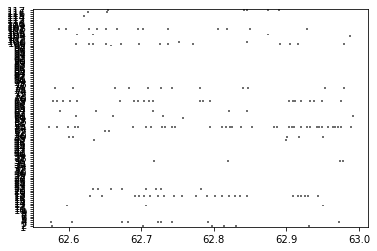

In [28]:
nel.plotting.rasterplot(exp_data['spikes'][aux_data['long']['PBEs'][0].support])

In [30]:
run=exp_data['pos1d'][aux_data['long']['st_run'].support]

In [33]:
run.support.length

4:22:766 minutes

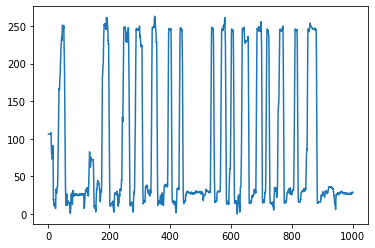

In [56]:
plt.plot(np.arange(60000)/60,np.squeeze(exp_data['pos1d'].data[0,:60000]))

In [52]:
12000/60

200.0

In [46]:
1180*60

70800

In [44]:
exp_data['pos1d'].support.data

array([[   0, 1180],
       [1250, 2580]])

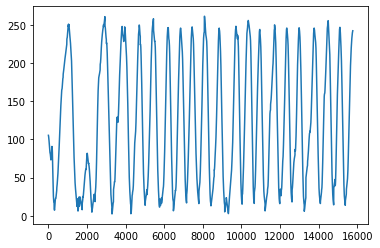

In [13]:
plt.plot(np.squeeze(exp_data['pos1d'][aux_data['long']['st_run'].support].data))

In [55]:
aux_data['long']['PBEs'].support.data

array([[  62.57239088,   62.99239088],
       [  63.63539088,   63.83539088],
       [  64.06839088,   64.18839088],
       [  64.76439088,   64.88439088],
       [  66.64039088,   66.78039088],
       [  67.94339088,   68.02339088],
       [  84.43239088,   84.65239088],
       [  85.82039088,   85.88039088],
       [  87.43639088,   87.53639088],
       [  88.45139088,   88.57139088],
       [  89.09139088,   89.19139088],
       [  91.19939088,   91.41939088],
       [  92.25439088,   92.31439088],
       [  94.12339088,   94.22339088],
       [  95.29739088,   95.41739088],
       [  96.56339088,   96.92339088],
       [  97.00439088,   97.12439088],
       [ 100.87239088,  100.95239088],
       [ 101.95339088,  102.27339088],
       [ 105.41739088,  105.49739088],
       [ 107.12039088,  107.22039088],
       [ 110.16739088,  110.34739088],
       [ 112.10839088,  112.20839088],
       [ 124.08739088,  124.36739088],
       [ 125.35939088,  125.45939088],
       [ 142.21439088,  1

**--------------------- change time bin size ---------------------**

In [6]:
PBEs_origin = exp_data['spikes'][aux_data['long']['PBEs'].support]

In [7]:
spikes = PBEs_origin.bin(ds=.004)

In [8]:
spikes.data.shape

(117, 6138)

In [9]:
spikes

<BinnedSpikeTrainArray at 0x7feb782acee0: 117 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117'] (150 segments) in 6,138 bins of width 4.0 milliseconds> for a total of 24.552 seconds

In [10]:
from scipy.io import loadmat

In [11]:
from scipy.io import savemat

In [15]:
rundata = loadmat('track1_100ms.mat')
rundata['spikes'].shape

(117, 11799)

In [16]:
runspikes = rundata['spikes'][:,np.squeeze(rundata['idx'])]
runspikes.shape

(117, 2785)

In [17]:
del rundata

In [57]:
run_rates = np.mean(runspikes,axis=1)
run_rates.shape

(117,)

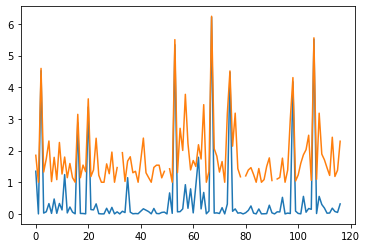

In [104]:
run_rates_nz = [] # run nonzero mean
for cellspike in runspikes:
    run_rates_nz.append(np.mean(cellspike[cellspike!=0]))
plt.plot(run_rates)
plt.plot(run_rates_nz)

In [105]:
run_rates_nz = np.array(run_rates_nz)
run_rates_nz[np.isnan(run_rates_nz)]=0

(array([100.,   7.,   2.,   0.,   1.,   1.,   1.,   2.,   2.,   1.]),
 array([0.        , 0.62136445, 1.2427289 , 1.86409336, 2.48545781,
        3.10682226, 3.72818671, 4.34955117, 4.97091562, 5.59228007,
        6.21364452]),
 <BarContainer object of 10 artists>)

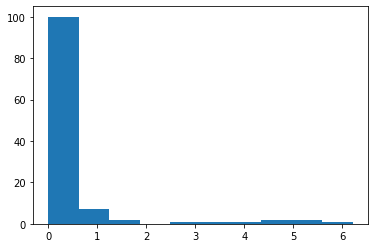

In [148]:
plt.hist(run_rates)

In [152]:
np.where(run_rates>2)

(array([  2,  16,  20,  53,  67,  74,  98, 106]),)

In [122]:
dss = []
c = []
for ds in range(5,51,2):
    spikes = PBEs_origin.bin(ds=.001*ds)
    
#     # non-zero mean
#     pbe_rates = []
#     for cellspike in spikes.data:
#         pbe_rates.append(np.mean(cellspike[cellspike!=0]))
#     pbe_rates_nz = np.array(pbe_rates)
#     pbe_rates_nz[np.isnan(pbe_rates_nz)]=0
#     c.append(pbe_rates_nz)
    
    pbe_rates = np.mean(spikes.data,axis=1)
    c.append(pbe_rates)

    dss.append(ds)

In [149]:
runspikes.shape

(117, 2785)

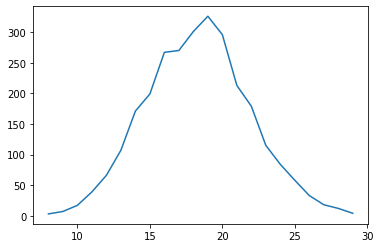

In [143]:
l, count = np.unique((runspikes>0).sum(axis=0),return_counts=True)
plt.plot(l,count)

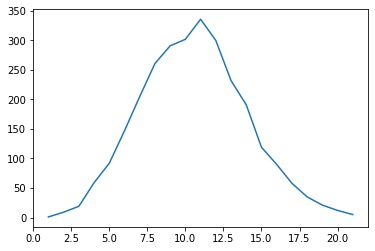

In [150]:
s = runspikes[run_rates<2,:]
l, count = np.unique((s>0).sum(axis=0),return_counts=True)
plt.plot(l,count)

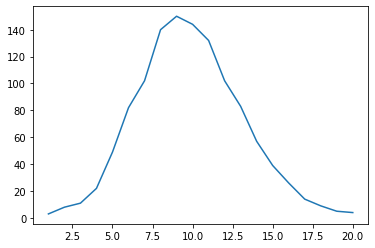

In [8]:
spikes = PBEs_origin.bin(ds=.001*20)
l, count = np.unique((spikes.data>0).sum(axis=0),return_counts=True)
plt.plot(l,count)

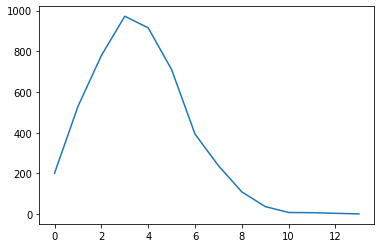

In [144]:
spikes = PBEs_origin.bin(ds=.001*5)
l, count = np.unique((spikes.data>0).sum(axis=0),return_counts=True)
plt.plot(l,count)

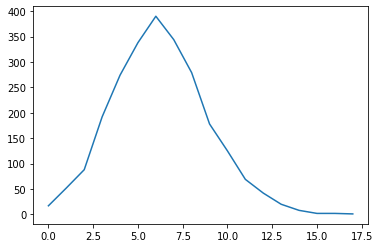

In [160]:
spikes = PBEs_origin.bin(ds=.001*10)
l, count = np.unique((spikes.data>0).sum(axis=0),return_counts=True)
plt.plot(l,count)

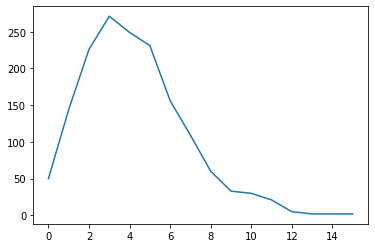

In [159]:
spikes = PBEs_origin.bin(ds=.001*15)
s = spikes.data[run_rates<2,:]
l, count = np.unique((s>0).sum(axis=0),return_counts=True)
plt.plot(l,count)

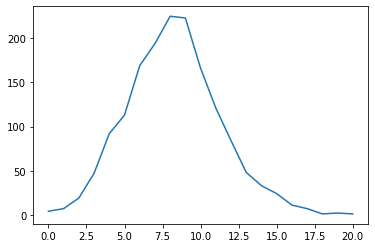

In [146]:
spikes = PBEs_origin.bin(ds=.001*15)
l, count = np.unique((spikes.data>0).sum(axis=0),return_counts=True)
plt.plot(l,count)

(array([101.,   6.,   5.,   0.,   0.,   0.,   2.,   1.,   1.,   1.]),
 array([0.        , 0.13406662, 0.26813325, 0.40219987, 0.5362665 ,
        0.67033312, 0.80439975, 0.93846637, 1.072533  , 1.20659962,
        1.34066625]),
 <BarContainer object of 10 artists>)

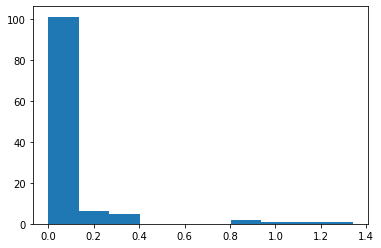

In [157]:
pbe_rates = spikes.data.mean(axis=1)
plt.hist(pbe_rates)

In [158]:
np.where(pbe_rates>.5)

(array([  2,  20,  74,  98, 106]),)

In [125]:
distance = []
for r in c:
    distance.append(np.linalg.norm(r-run_rates))

Text(0.5, 0, 'time bin size (ms)')

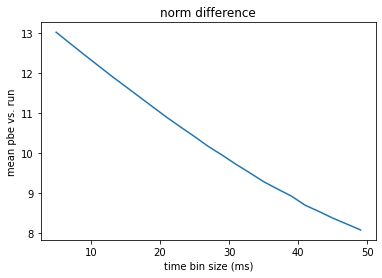

In [126]:
plt.plot(dss,distance)
plt.title('norm difference')
plt.ylabel('mean pbe vs. run')
plt.xlabel('time bin size (ms)')

In [129]:
cc = []
for pbe_rates in c:
    cc.append(np.inner(pbe_rates,run_rates)/(np.linalg.norm(pbe_rates)*np.linalg.norm(run_rates)))

Text(0.5, 0, 'time bin size (ms)')

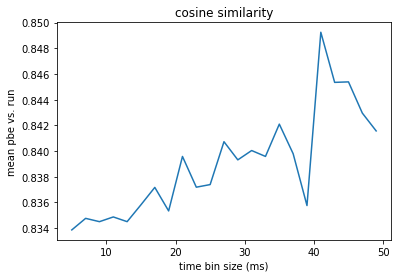

In [130]:
plt.plot(dss,cc)
plt.title('cosine similarity')
plt.ylabel('mean pbe vs. run')
plt.xlabel('time bin size (ms)')

Text(0.5, 0, 'time bin size (ms)')

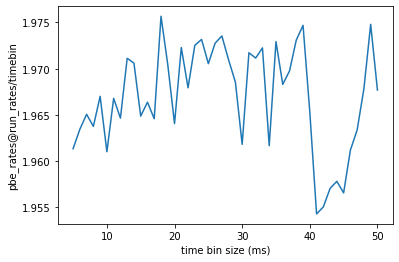

In [93]:
plt.plot(dss,c)
plt.ylabel('pbe_rates@run_rates/timebin')
plt.xlabel('time bin size (ms)')

In [164]:
spikes.data.shape

(117, 2421)

In [168]:
spikes.bins,spikes.bins.shape, spikes.binned_support.shape

(array([  62.57239088,   62.58239088,   62.59239088, ..., 1164.78339088,
        1164.79339088, 1164.80339088]),
 (2571,),
 (150, 2))

In [169]:
150+2421

2571

In [12]:
spikes.bin_centers.shape

(6138,)

In [13]:
spikes.bin_centers

array([  62.57439088,   62.57839088,   62.58239088, ..., 1164.79339088,
       1164.79739088, 1164.80139088])

In [15]:
idx = np.floor(spikes.bin_centers/0.004).astype('int')
idx = idx - idx[0] + 1
idx

array([     1,      2,      3, ..., 275556, 275557, 275558])

In [17]:
u = np.unique(idx)
u.shape

(6138,)

In [16]:
idx.shape

(6138,)

In [18]:
dic = {"spikes": spikes.data, "idx": idx}
savemat('track1_PBEs_4ms.mat',dic)

**--------------------- end change time bin size ---------------------**

In [18]:
aux_data['long']['PBEs'].data.shape

(117, 1239)

In [19]:
aux_data['long']['pos2d'], aux_data['long']['st_run'], aux_data['long']['tc'], aux_data['long']['tc_placecells']

(<AnalogSignalArray at 0x7f91b3f0dcd0: 2 signals> for a total of 19:40 minutes,
 <SpikeTrainArray at 0x7f91b3f5d970: 117 units (89 segments)> at 32552 Hz from 2006-6-07_16-40-19,
 <TuningCurve1D at 0x7f91b3f006d0> with shape (117, 100),
 <TuningCurve1D at 0x7f91b3f007f0> with shape (43, 100))

In [61]:
aux_data['long']['PBEs'].lengths

array([21, 10,  6,  6,  7,  4, 11,  3,  5,  6,  5, 11,  3,  5,  6, 18,  6,
        4, 16,  4,  5,  9,  5, 14,  5,  6,  5,  8,  8,  7,  6,  7, 12,  8,
        6, 19, 18,  9,  4,  6,  4, 11, 12, 12,  8,  9,  8,  5,  5,  5,  7,
        6,  6,  6,  5,  6, 11, 12, 10, 11,  6,  5,  8,  8,  4, 11,  5, 10,
       10,  4,  6, 25,  6, 10,  4,  7,  6, 12,  6, 17,  8,  5,  5,  4,  8,
        4,  4,  7, 10, 10, 11,  8,  7,  8, 10, 13,  6, 12,  6,  7, 10,  8,
        9,  8,  5,  5,  6,  5,  5, 11, 12,  5, 12,  7,  5,  6,  6,  4, 10,
        4,  7, 11,  8,  5,  9, 11, 15,  6, 13,  7,  4,  8, 13,  5,  8,  9,
       12, 17, 11,  9,  5,  6,  4,  8, 31,  6,  4, 16, 13,  9])

In [68]:
idx_st = np.round(aux_data['long']['PBEs'].support.starts/0.02).astype('int')
idx_st

array([ 3129,  3182,  3203,  3238,  3332,  3397,  4222,  4291,  4372,
        4423,  4455,  4560,  4613,  4706,  4765,  4828,  4850,  5044,
        5098,  5271,  5356,  5508,  5605,  6204,  6268,  7111,  7132,
        7251,  8031,  8627, 11104, 11161, 11196, 11285, 11762, 11774,
       12611, 13682, 14554, 15656, 15713, 19479, 19920, 20020, 20066,
       21132, 21271, 22407, 22426, 22903, 23057, 23161, 23557, 23626,
       23840, 23936, 24167, 24361, 24414, 24471, 24855, 24877, 25135,
       25636, 25905, 25935, 26206, 26243, 26424, 27476, 28028, 28165,
       28649, 29378, 30226, 33047, 33148, 33900, 35289, 35321, 35576,
       36095, 36573, 38139, 38829, 38904, 38982, 39446, 39645, 40145,
       40184, 41107, 41142, 41281, 41586, 41856, 43548, 43651, 44469,
       44915, 45542, 45653, 46110, 46148, 46436, 46482, 46562, 46580,
       46719, 47273, 47510, 47562, 47700, 47857, 48060, 48082, 48382,
       48429, 48560, 48736, 48867, 48891, 49011, 49290, 49387, 49843,
       50082, 50352,

In [69]:
idx = []
for length,st in zip(aux_data['long']['PBEs'].lengths,idx_st):
    idx.append(np.arange(length)+st)

In [70]:
idx

[array([3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139,
        3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149]),
 array([3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191]),
 array([3203, 3204, 3205, 3206, 3207, 3208]),
 array([3238, 3239, 3240, 3241, 3242, 3243]),
 array([3332, 3333, 3334, 3335, 3336, 3337, 3338]),
 array([3397, 3398, 3399, 3400]),
 array([4222, 4223, 4224, 4225, 4226, 4227, 4228, 4229, 4230, 4231, 4232]),
 array([4291, 4292, 4293]),
 array([4372, 4373, 4374, 4375, 4376]),
 array([4423, 4424, 4425, 4426, 4427, 4428]),
 array([4455, 4456, 4457, 4458, 4459]),
 array([4560, 4561, 4562, 4563, 4564, 4565, 4566, 4567, 4568, 4569, 4570]),
 array([4613, 4614, 4615]),
 array([4706, 4707, 4708, 4709, 4710]),
 array([4765, 4766, 4767, 4768, 4769, 4770]),
 array([4828, 4829, 4830, 4831, 4832, 4833, 4834, 4835, 4836, 4837, 4838,
        4839, 4840, 4841, 4842, 4843, 4844, 4845]),
 array([4850, 4851, 4852, 4853, 4854, 4855]),
 array([5044, 50

In [72]:
idx = np.concatenate(idx)

In [73]:
idx

array([ 3129,  3130,  3131, ..., 58237, 58238, 58239])

In [75]:
dic1 = {"spikes": aux_data['long']['PBEs'].data, "idx": idx}
dic1["spikes"].shape, dic1["idx"].shape

((117, 1239), (1239,))

In [76]:
savemat('track1_PBEs.mat',dic1)

### track2

In [12]:
aux_data['short']['PBEs']

<BinnedSpikeTrainArray at 0x7f91b3f160a0: 117 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117'] (277 segments) in 2,056 bins of width 20.0 milliseconds> for a total of 41.12 seconds

In [20]:
aux_data['short']['pos2d'], aux_data['short']['st_run'], aux_data['short']['tc'], aux_data['short']['tc_placecells']

(<AnalogSignalArray at 0x7f91b3e71850: 2 signals> for a total of 22:10 minutes,
 <SpikeTrainArray at 0x7f91b3ec3160: 117 units (51 segments)> at 32552 Hz from 2006-6-07_16-40-19,
 <TuningCurve1D at 0x7f91b3edbf10> with shape (117, 100),
 <TuningCurve1D at 0x7f91b3ee7070> with shape (47, 100))

In [41]:
aux_data['short']['pos2d'].data.shape

(2, 79800)

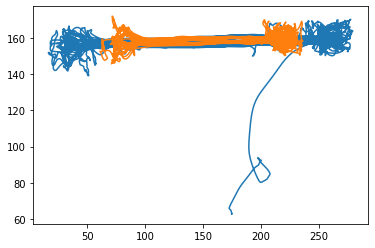

In [43]:
plt.plot(aux_data['long']['pos2d'].data[0,:],aux_data['long']['pos2d'].data[1,:])
plt.plot(aux_data['short']['pos2d'].data[0,:],aux_data['short']['pos2d'].data[1,:])

In [33]:
aux_data['short']['PBEs'].lengths.sum(), aux_data['short']['PBEs'].data.shape

(2056, (117, 2056))

In [34]:
aux_data['short']['PBEs'].lengths

array([10,  5,  4,  8,  7, 15,  8,  5,  5,  4,  9,  8,  4,  5, 13,  7,  7,
        6,  6, 11,  8,  5,  7, 10,  8,  6, 10,  5, 11,  6,  9,  4,  9,  4,
       10,  8,  9,  5,  9,  4,  8,  5,  6,  4,  6,  4,  4,  7,  7,  8,  6,
       15,  5,  8, 13,  5,  4,  5,  4,  5,  5, 11,  7,  5,  5,  5,  7,  4,
        4,  8,  9, 11,  5,  5, 11, 14,  4,  8,  9,  7, 11,  4, 11,  5,  6,
        6,  4,  4,  9,  6, 11,  6,  6, 11,  7,  5, 10,  4,  7,  4,  4,  8,
        7, 10,  7,  5,  7,  5,  8,  5,  6,  6, 12,  5,  4, 10,  5,  5,  5,
        3,  6,  7,  7,  7,  8,  4,  6, 10,  7,  8, 17, 11,  7,  8,  6, 11,
        5, 10,  5,  4,  6, 11,  5, 10, 11,  9,  9,  9,  7,  8,  9,  7, 10,
        6, 12, 14, 16, 11, 14, 10,  8,  9, 10, 10,  5, 11,  6,  4,  4,  8,
        7,  8, 10,  5,  9,  7,  7,  6,  4,  8, 12,  4,  5,  7, 17,  8,  4,
        6, 11,  4,  7, 11, 11,  7,  4,  8,  3,  4, 10,  7,  4,  5, 13, 12,
        4,  7, 12,  7,  5,  5,  5,  5, 11,  6,  8,  8, 19,  5,  7,  9,  6,
       11,  4, 10,  6,  4

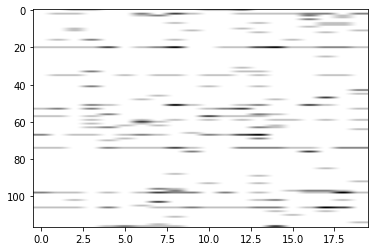

In [37]:
plt.imshow(-aux_data['short']['PBEs'].data[:,:20],cmap='gray',aspect='auto')

## running epochs

In [30]:
pos_dsp = exp_data['pos1d'].downsample(fs_out=10)
pos_dsp.data.shape

(1, 25100)

In [31]:
spikes = exp_data['spikes'].bin(ds=.1)
spikes.data.shape

(117, 25099)

In [8]:
spikes[pos_dsp[0].support].data.shape,pos_dsp[0].data.shape,spikes[pos_dsp[1].support].data.shape,pos_dsp[1].data.shape

((117, 11799), (1, 11800), (117, 13300), (1, 13300))

In [32]:
def get_run_epochs(speed_linear, v1=5, v2=10, plot=False, display_range=[2000,4000]):
    """v1: speed boundary threshold; 
       v2: speed peak threshold. """
    from scipy.signal import savgol_filter
    speed = np.abs(savgol_filter(speed_linear, 21, 2))
    
    spd_thr = np.where(speed>v1)[0]
    idx_end = np.where(np.diff(spd_thr)>1)[0]
    idx_end = np.append(idx_end,len(spd_thr)-1)
    idx_st = idx_end[:-1]+1
    idx_st = np.insert(idx_st,0,0)
    
    idx_st_thr = []
    idx_end_thr = []
    idx = np.array([])
    for i in range(len(idx_st)):
        if np.where(speed[spd_thr[idx_st[i]:idx_end[i]]]>v2)[0].shape[0]>0:
            idx_st_thr.append(idx_st[i])
            idx_end_thr.append(idx_end[i])
            idx = np.concatenate([idx,np.arange(spd_thr[idx_st[i]],spd_thr[idx_end[i]])])
    idx_st_thr = np.array(idx_st_thr)
    idx_end_thr = np.array(idx_end_thr)
    idx = idx.astype('int')
    
    if plot:
        plt.figure(figsize=(15,3))
        plt.plot(speed, label='filtered speed')
        plt.plot(spd_thr,speed[spd_thr],'.', label=f'speed > {v1}')
        plt.plot(idx,speed[idx],'*', label=f'peak speed > {v2}')
        plt.plot([0,len(speed)],[v2,v2])
        plt.xlim(display_range[0],display_range[1])
        plt.legend()
        plt.show()
    
    return idx

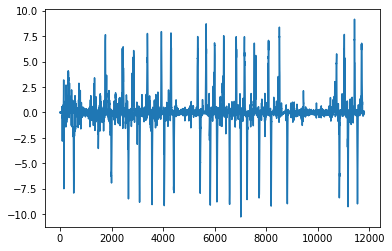

In [103]:
plt.plot(np.diff(pos_dsp[0].data.squeeze()))

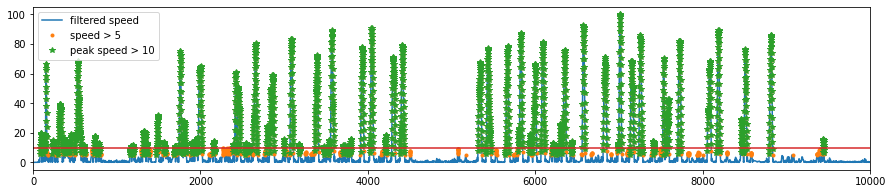

In [33]:
track1_pos = pos_dsp[0].data.squeeze()
speed_linear = np.diff(track1_pos)*10
idx1 = get_run_epochs(speed_linear, v1=5, v2=10, plot=True, display_range=[0,10000])

In [34]:
track1_spikes = spikes[pos_dsp[0].support].data[:,idx1]
track1_spikes.shape

(117, 2785)

In [48]:
track1_pos = track1_pos[idx1]
track1_pos.shape

(2785,)

In [49]:
rd_pos = np.round((track1_pos-track1_pos.min())/(track1_pos.max()-track1_pos.min())*49)
(np.unique(rd_pos)).shape

(50,)

In [56]:
pos_list = np.unique(rd_pos)
tc = np.zeros((117,50))
for i in range(50):
    tc[:,i]=np.mean(track1_spikes[:,rd_pos==pos_list[i]],axis=1)

In [ ]:
savemat()

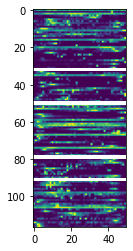

In [58]:
m = np.max(tc,axis=1)
plt.imshow(tc/m[:,np.newaxis])

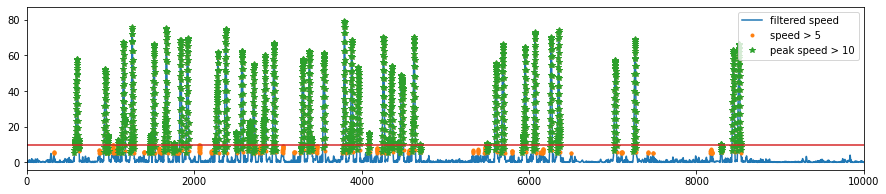

In [128]:
track2_pos = pos_dsp[1].data.squeeze()
speed_linear = np.gradient(track2_pos)*10
idx2 = get_run_epochs(speed_linear, v1=5, v2=10, plot=True, display_range=[0,10000])

In [116]:
track2_spikes = spikes[pos_dsp[1].support].data[:,idx2]
track2_spikes.shape

(117, 1772)

In [119]:
track1_pos.shape, track2_pos.shape, spikes[pos_dsp[0].support].data.shape, spikes[pos_dsp[1].support].data.shape

((11800,), (13300,), (117, 11799), (117, 13300))

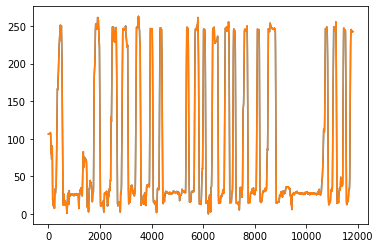

In [121]:
pos1 = (track1_pos[1:]+track1_pos[:-1])/2
plt.plot(track1_pos)
plt.plot(pos1)

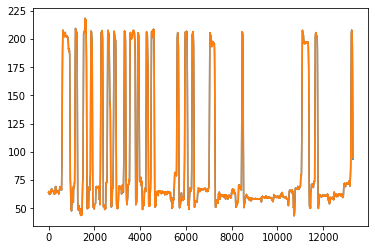

In [126]:
pos2 = (track2_pos[1:]+track2_pos[:-1])/2
plt.plot(track2_pos)
plt.plot(pos2)

In [130]:
pos1.shape,pos2.shape

((11799,), (13299,))

In [123]:
dic1 = {"position": pos1, "spikes": spikes[pos_dsp[0].support].data, "idx": idx1}
dic1["position"].shape, dic1["spikes"].shape, dic1["idx"].shape

((11799,), (117, 11799), (2785,))

In [74]:
from scipy.io import savemat

In [125]:
savemat('track1.mat',dic1)

In [129]:
dic2 = {"position": track2_pos, "spikes": spikes[pos_dsp[1].support].data, "idx": idx2}
dic2["position"].shape, dic2["spikes"].shape, dic2["idx"].shape

((13300,), (117, 13300), (1769,))

In [131]:
savemat('track2.mat',dic2)